# Regression Analysis

## Load the dataset 

In [26]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Data Preparation

In [2]:
# load the data and convert to a dataframe
california_housing = fetch_california_housing(as_frame=True)
california_housing = california_housing.frame
california_housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

## Exploratory Data Analysis

In [3]:
# descriptive statistics
california_housing.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [4]:
# check for missing values
california_housing.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
# check the data types
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# check the columns
california_housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

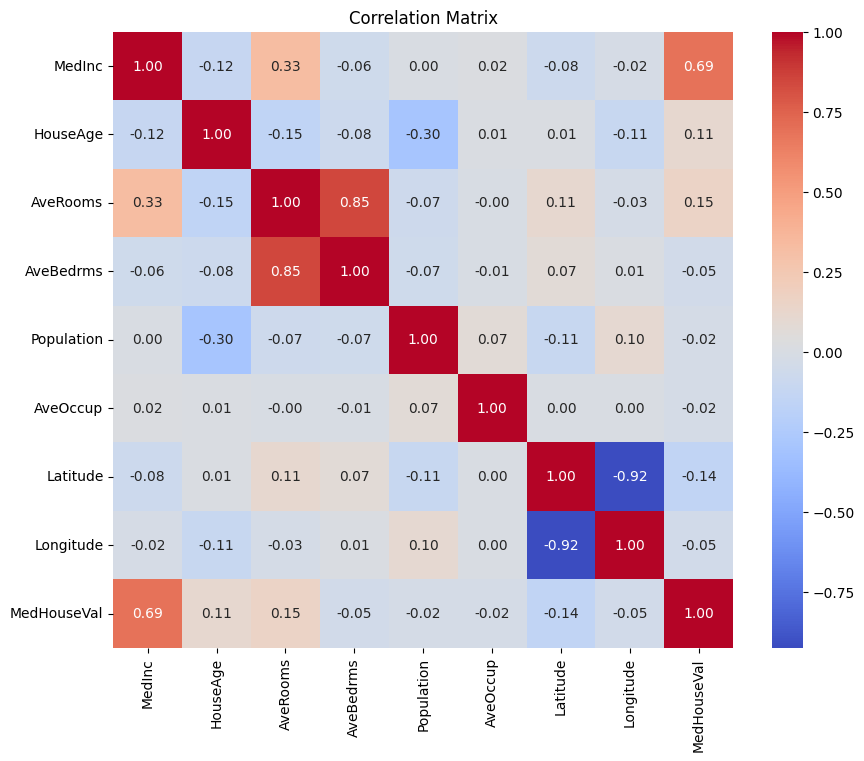

In [7]:
# Correlation matrix
correlation_matrix = california_housing.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

From the correlation matrix it is evident that the Median Income feature has a strong positive correlation of 0.69 and when the median income increases the median house value increase too while the rest of the features have weaker correlation.

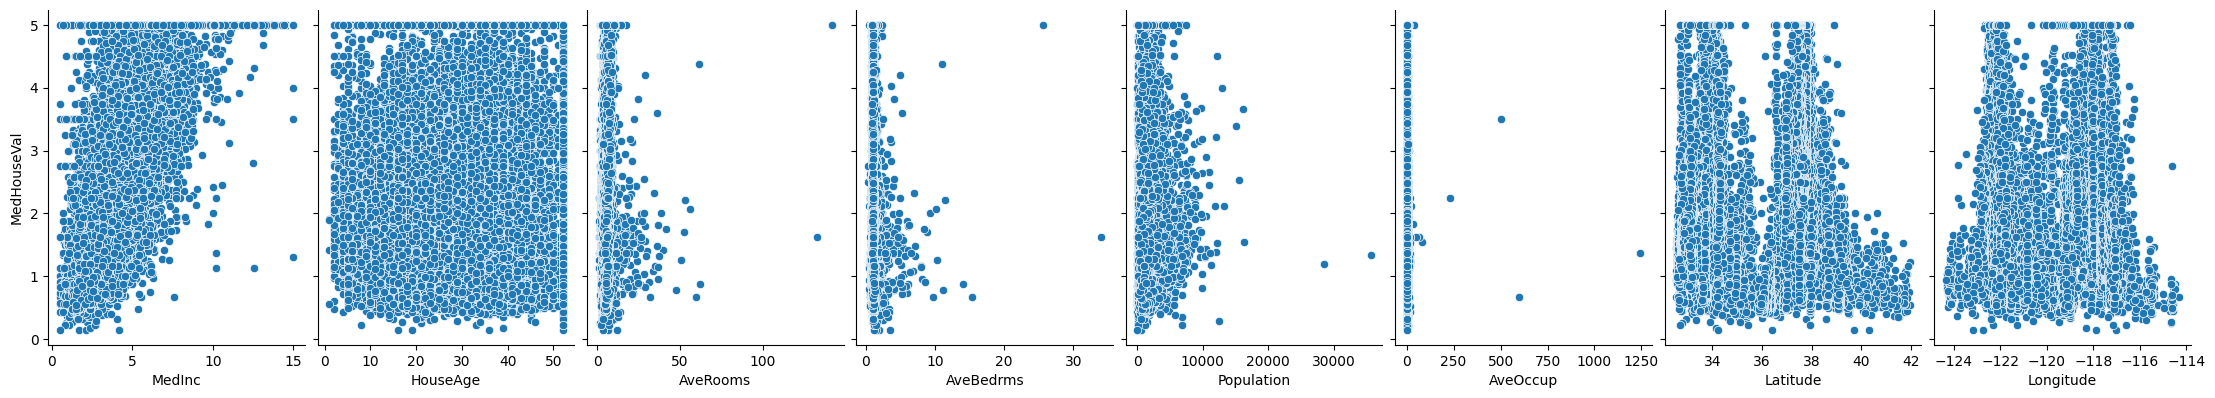

In [8]:

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',  'AveOccup',
       'Latitude', 'Longitude']

# Pairplot to visualize relationships
sns.pairplot(california_housing, x_vars=features, y_vars=['MedHouseVal'], height=4, aspect=0.7, kind='scatter')
plt.show()


# Regression Analysis

## Preparing the data for linear and logistic regression model

In [9]:
# define x and y using the new dataframe
# Define X and y using iloc
X = california_housing.iloc[:, :-1]  # All columns except the last one as features
y = california_housing.iloc[:, -1]   # The last column as the target variable


In [11]:
# split the data as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [12]:
# check the splitted data is the same size
print("X_train:", X_train.shape)  
print("X_test:",  X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (16512, 8)
X_test: (4128, 8)
y_train: (16512,)
y_test: (4128,)


In [13]:
# Create a linear regression model
model = LinearRegression()

In [14]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [15]:
#print c - y intercept remember y =mX + c
c = model.intercept_
c

np.float64(-36.08608764463149)

In [16]:
# check coeffiecient - m
m = model.coef_
m

array([ 4.35305378e-01,  9.63496081e-03, -1.10862824e-01,  6.54239488e-01,
       -4.99831360e-06, -3.41125112e-03, -4.12503664e-01, -4.24746906e-01])

In [17]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [22]:
#Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred) 
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.5678864298646297


In [20]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)               
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.7535823975283855


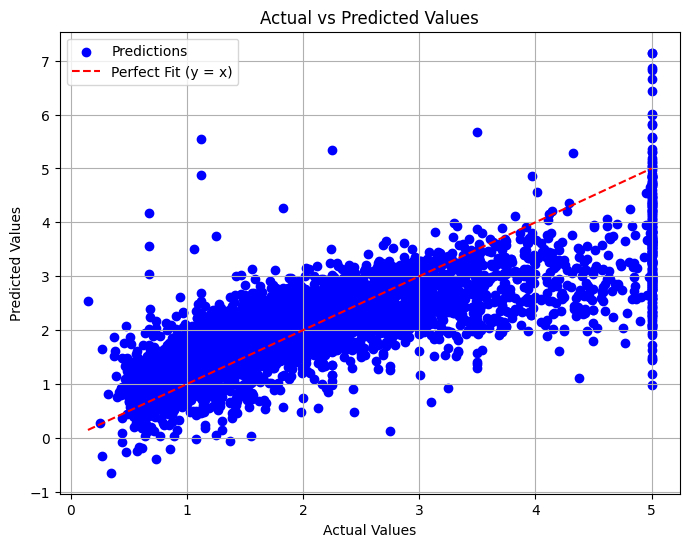

In [21]:
# Plot actual vs predicted  values
# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predictions")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    label="Perfect Fit (y = x)",
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Logistic Regression

## I want to classify whether a house value is above or below the median value.

In [29]:
# create a target column with outcome 1 or 0
# 1 represent house whose house value is above the median or 0 house value is below median
